**Task 3.1 Unsupervised Learning - Clustering**

**04.04.2025**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [7]:
df = pd.read_csv('food.csv')

**Preprocessing data using z-transformation**

standarisieren damit alle Variablen gleich gewichtet werden

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

**Apply KMeans clustering**

k-means -> Clustering-Algorithmus der Datenpunkte in k Gruppen (Cluster) untereilt

-> so das die Punkte innerhalb des Clusters möglichst ähnlich sind 
-> und die Punkte zwischen den Clustern möglichst unterschiedlich sind 

Ziel: Minimieren der Varianz innehalb der Cluster

Funktion:
1. festlegen, in wie viele Gruppen (Cluster) die Daten aufgeteilt werden sollen (z.b k = 3)
2. der Alogrithmus wählt zufällig k Punkte aus dem Datenraum als Start-Zentren aus
3. jeder Punkt wird dem nächstgelegenen Zentrum zugewiesen -> so entstehen k Gruppen
4. für jeden Cluster wird das neue Zentrum berechnet als der Mittelwert aller Punkte im Cluser
5. wiederholt Schritt 3 und 4 bis sich die Zenren nicht mehr ändern

In [30]:
best_k = None
best_score = -1
silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=45)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append((k, score))
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Beste Anzahl an Clustern: k = {best_k} mit Silhouette Score = {best_score:.4f}")

Beste Anzahl an Clustern: k = 3 mit Silhouette Score = 0.3390


**Visualize final KMeans clusterung using PCA**

PCA (Hauptkomponentenanalyse) -> dimensionsreduzierendes Verfahren ohne zu viele Informationen zu verlieren

"PCA dreht das Koordinatensystem der Daten so, dass du sie in 2D sehen kannst, mit möglichst viel erhaltener Information"

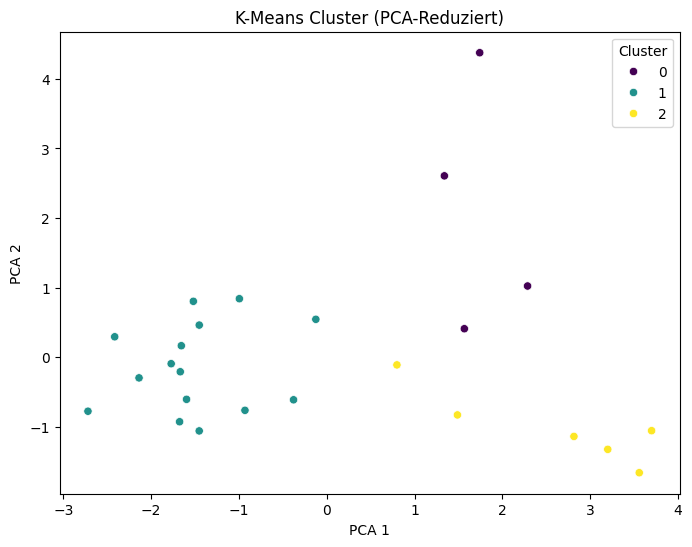

In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette="viridis")
plt.title("K-Means Cluster (PCA-Reduziert)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

**Erkenntnis	Bedeutung**
Farbig markierte Gruppen -> Das sind die Cluster (aus K-Means)

Wenig Überlappung ->Gute Trennung der Cluster – gutes Clustering

Punkte nah beieinander -> Ähnliche Datenpunkte

PCA-Achsen -> Erlauben die beste 2D-Projektion der echten (9D)-Struktur

= die Daten lassen dich druch kmeans sinnvoll gruppieren

**Perfoming hierarchical clustering**

Ein Dendrogramm ist ein Baumdiagramm, das zeigt, wie Gruppen von Datenpunkten schrittweise zusammengeführt werden – ähnlich wie ein Stammbaum.

es zeigt:

-> Welche Punkte zusammengehören

-> Wie ähnlich oder unähnlich sie sind

-> Wie viele Cluster sinnvoll sind

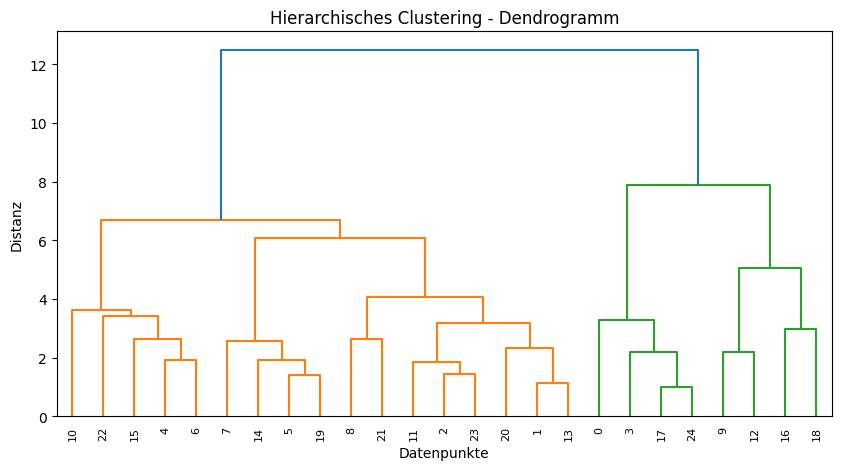

In [13]:
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchisches Clustering - Dendrogramm")
plt.xlabel("Datenpunkte")
plt.ylabel("Distanz")
plt.show()

Bedeutung:

Viele enge, niedrige Verbindungen unten	-> Diese Datenpunkte sind sich sehr ähnlich

Drei Hauptäste oben (Farben zeigen das)	-> Wahrscheinlich 3 Cluster in den Daten

Die Verbindung ganz oben bei ~12 Distanz -> Das ist der unähnlichste Merge – zwei sehr verschiedene Gruppen

**Creating a heatmap**

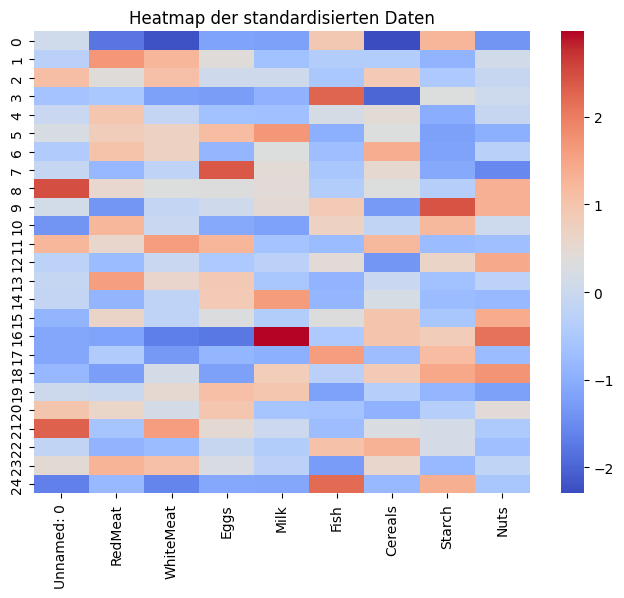

In [25]:

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(df_scaled, columns=df.columns[:df_scaled.shape[1]]), cmap="coolwarm")
plt.title("Heatmap der standardisierten Daten")
plt.show()


**Performing density-based clustering**

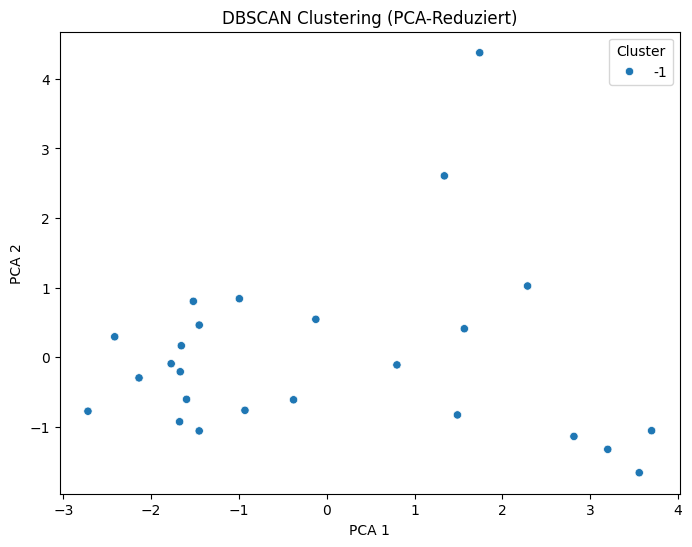

In [26]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['DBSCAN_Cluster'], palette="tab10")
plt.title("DBSCAN Clustering (PCA-Reduziert)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()